**Autores:**
- Carolina Naranjo
- Daniel Guzman
- Johana Castillo
- Juan Martin Pastuso Borda


A continuación se presenta un análisis univariado y bivariado, ya que hemos cambiado el dataset anterior por motivos de fuerza mayor.

# CONTEXTO JOHANA

### Dataset: Datos clinicos sobre diabetes

El data set que se presenta a continuación incluye información de 100.000 personas, recopilando variables demográficas y de salud para el estudio de la diabetes.

Fuente: https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows


**Pregunta SMART**
- ¿Cuáles son los factores de riesgo para el desarrollo de diabetes e hipertensión en 2019 en la población Estadounidense, considerando las variables demográficas, de salud y de estilo de vida?


# Análisis del DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis

Leer dataset

In [3]:

df = pd.read_csv('diabetes_dataset_with_notes.csv').drop('clinical_notes', axis=1)
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


DESCRIPCIÓN DE LAS VARIABLES /DICCIONARIO O METADATOS DEL DATASET:

| Columna | Descripción | Tipo | Rango / No. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| year | año del registro | Cualitativa | Categorías: 7 (2015, 2016, 2018, 2019, 2020, 2021, 2022)|
| gender | genero | Cualitativa | Categorías: 3 (Female, Male, Other)|
| age | Edad |Cuantitativa | Rango: [0 - 80] |
| location | Locación | Cualitativa | Categorías: 55 |
| race:AfricanAmerican | Afro-Americanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Asian | Asiatico | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Caucasian | Caucasicos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Hispanic | Hispanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Other | Otra | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| hypertension | Sufre de hipertension | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| heart_disease | Sufre de enfermedades cardiacas | Cualitativa | Categorías: 2 (0: No, 1: Si) |
| smoking_history | Historal de fumador | Cualitativa | Categorías: 6(nunca, no actualmente, actualmente, Sin informacion, Alguna vez, Anteriormente) |
| bmi | Indice de masa corporal | Cuantitativa | Rango: [10 - 95.7] |
| hbA1c_level | Nivel de hemoglobina glucolisada  | Cuantitativa | Rango: [3.5 - 9] |
| blood_glucose_level | Nivel de glucosa en la sangre| Cuantitativa | Rango: [80 - 300] |
| diabetes | Sufre de diabetes | Cualitativa | Categorías: 2 (0: No, 1: Si) |

Información general según python:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Verifiquemos la presencia de datos nulos:

In [5]:
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

Verifiquemos la presencia de datos duplicados:

In [6]:
df.duplicated().sum()

14

In [7]:
df[df.duplicated()]

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
2848,2019,Male,40.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65.0,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21.0,Guam,0,1,0,0,0,0,0,never,27.32,6.6,155,0
33506,2019,Male,13.0,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46.0,Maryland,0,1,0,0,0,0,0,never,27.32,6.6,90,0
57881,2019,Female,62.0,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14.0,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11.0,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80.0,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0
71285,2019,Female,80.0,North Dakota,0,0,1,0,0,0,0,No Info,27.32,5.8,126,0


In [8]:
df.drop_duplicates(inplace=True)
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  99986 non-null  int64  
 1   gender                99986 non-null  object 
 2   age                   99986 non-null  float64
 3   location              99986 non-null  object 
 4   race:AfricanAmerican  99986 non-null  int64  
 5   race:Asian            99986 non-null  int64  
 6   race:Caucasian        99986 non-null  int64  
 7   race:Hispanic         99986 non-null  int64  
 8   race:Other            99986 non-null  int64  
 9   hypertension          99986 non-null  int64  
 10  heart_disease         99986 non-null  int64  
 11  smoking_history       99986 non-null  object 
 12  bmi                   99986 non-null  float64
 13  hbA1c_level           99986 non-null  float64
 14  blood_glucose_level   99986 non-null  int64  
 15  diabetes              99

### Preparación de los datos:

La base de datos contiene información sobre la raza. Esta variable es importante porque es uno de los factores de riesgo para presentar diabetes, sin embargo la forma como está presentada no permite hacer un adecuado análisis. Por tanto, se crea una columna que apile los datos de raza (Americano, asiatico, caucasico, hispano y otros)

In [10]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
df = df.copy()
# Crea la nueva columna basada en la columna con el valor 1
df['race'] = df[race_columns].idxmax(axis=1).str.replace('race:', '')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,AfricanAmerican


Para la variable 'smoking_history' estableceremos una mejor descripción en las categorías.

In [11]:
categorias = {'No Info': 'Sin_Información', 'current': 'Fumador_Actual', 'never': 'Nunca_Fumó',
              'former': 'Ex_Fumador', 'not current': 'No_Fuma_Actualmente', 'ever': 'Alguna_vez_fumó'}

df['smoking_history'] = df['smoking_history'].replace(categorias)
df['smoking_history'].value_counts()

smoking_history
Sin_Información        35806
Nunca_Fumó             35091
Ex_Fumador              9352
Fumador_Actual          9286
No_Fuma_Actualmente     6447
Alguna_vez_fumó         4004
Name: count, dtype: int64

Preparemos al información para gender:

In [12]:
df['gender'].value_counts()

gender
Female    58546
Male      41422
Other        18
Name: count, dtype: int64

Debito a la baja representacion de la categoría "Other" en la variable "gender" procedemos a eliminar estos datos:

In [13]:
df = df[df['gender'] != 'Other']
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,Nunca_Fumó,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,Nunca_Fumó,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,Nunca_Fumó,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,Nunca_Fumó,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,Nunca_Fumó,23.75,6.5,90,0,AfricanAmerican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,Nunca_Fumó,21.21,6.5,90,0,Other
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,Sin_Información,36.66,5.7,100,0,Asian
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,Alguna_vez_fumó,36.12,6.2,158,0,Asian
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,No_Fuma_Actualmente,29.29,6.0,155,0,AfricanAmerican


### Análisis Exploratorio de las Variables:

Para obtener un análisis estadistico y exploratorio completo emplearemos las siguientes funciones:

In [14]:
def tabla_descriptivas(columnas):
    """
    Retorna estadísticas descriptivas de columnas numéricas, incluyendo coeficiente de variación, asimetría y curtosis.

    Parámetros:
        columnas (pd.Series o pd.DataFrame): Datos numéricos.

    Retorna:
        pd.DataFrame: Tabla con estadísticas descriptivas.
    """
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

## Función para construir tablas de frecuencias
def tabla_freq(columna):
    """
    Crea una tabla con frecuencias absolutas y relativas de una columna categórica.

    Parámetros:
        columna (pd.Series): Datos categóricos.

    Retorna:
        pd.DataFrame: Tabla con frecuencias absolutas y relativas.
    """
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

1) Gender: Está variable permite identificar la distribución del sexo del dataset:

In [15]:
tabla_gender = tabla_freq(df['gender'])
tabla_gender

col_0,gender,Frec. Abs.,Frec. Rel.
0,Female,58546,0.585647
1,Male,41422,0.414353


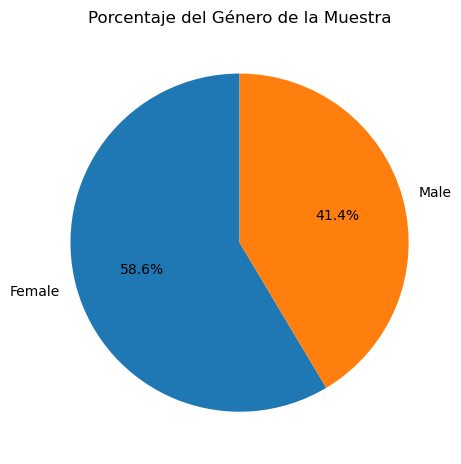

In [16]:

# grafico de torta
plt.figure(figsize=(12,8)) 
plt.subplot(1,2,2)
plt.pie(tabla_gender["Frec. Rel."], labels=tabla_gender["gender"],autopct='%1.1f%%',startangle=90)
plt.title('Porcentaje del Género de la Muestra')
plt.show() 

**Conclusión:** De acuerdo con el gráfico, se evidencia un balance en los datos de la variable género.

2) Location: Está variable permite conocer la ubicación de las personas que participaron en la muestra.

In [17]:
locacion = df['location'].value_counts()

**Conclusión:** La variable "location" presenta una alta variabilidad de los estados en los que habitan los participantes de la muestra, todos los estados pertenecen a EEUU.

3) smoking_history: Esta variable nos entrega el historial clinico de la muestra.

In [18]:
tabla_smoking = tabla_freq(df['smoking_history']).sort_values('Frec. Abs.', ascending=False)
tabla_smoking

col_0,smoking_history,Frec. Abs.,Frec. Rel.
5,Sin_Información,35800,0.358115
4,Nunca_Fumó,35088,0.350992
1,Ex_Fumador,9352,0.093550
2,Fumador_Actual,9286,0.092890
3,No_Fuma_Actualmente,6439,0.064411
0,Alguna_vez_fumó,4003,0.040043


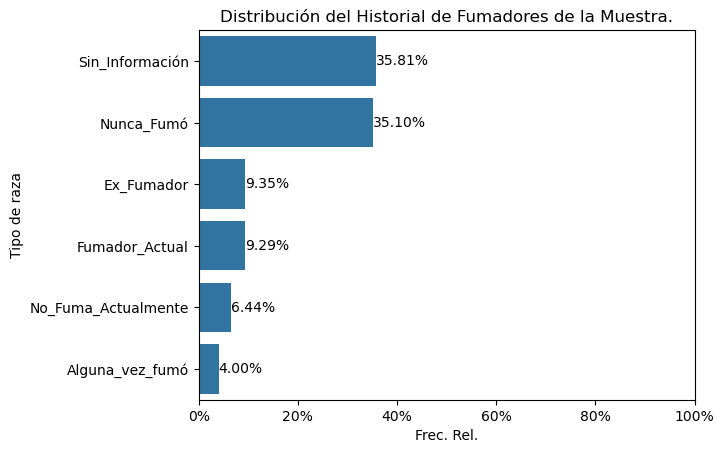

In [19]:
#Gráficar
frec_smoking=sns.barplot(y=tabla_smoking['smoking_history'],x=tabla_smoking["Frec. Rel."]*100)
frec_smoking.bar_label(frec_smoking.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
frec_smoking.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_smoking.set(xlim=(0, 100))
frec_smoking.set_ylabel('Tipo de raza')
frec_smoking.set_title('Distribución del Historial de Fumadores de la Muestra.')
plt.show()

**Conclusión:** Johanita

4) race: Variable para identificar la raza del participante de la muestra.

In [20]:
tabla_race = tabla_freq(df["race"]).sort_values('Frec. Abs.', ascending=False)
tabla_race

col_0,race,Frec. Abs.,Frec. Rel.
0,AfricanAmerican,20219,0.202255
1,Asian,20005,0.200114
4,Other,19996,0.200024
3,Hispanic,19884,0.198904
2,Caucasian,19864,0.198704


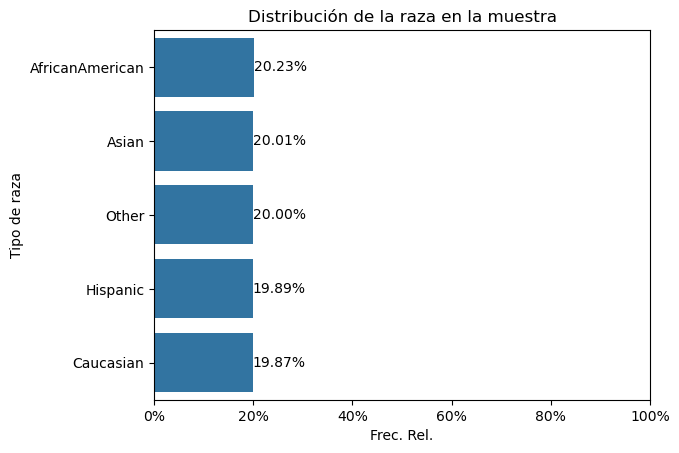

In [21]:
#Gráficar
tipo_race=sns.barplot(y=tabla_race['race'],x=tabla_race["Frec. Rel."]*100)
tipo_race.bar_label(tipo_race.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
tipo_race.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
tipo_race.set(xlim=(0, 100))
tipo_race.set_ylabel('Tipo de raza')
tipo_race.set_title('Distribución de la raza en la muestra')
plt.show()

**Conclusión:** La  gráfica de distribución de la raza junto con la tabla de frecuencias muestra que los datos están equilibrado, indicando que ninguna raza domina el conjunto de datos,esta distribución reduce el riesgo de que al hacer un modelo favorezca ciertos grupos debido a un desequilibrio en los datos.

5. heart_disease

In [22]:
tabla_heart = tabla_freq(df["heart_disease"])
tabla_heart

col_0,heart_disease,Frec. Abs.,Frec. Rel.
0,0,96026,0.960567
1,1,3942,0.039433


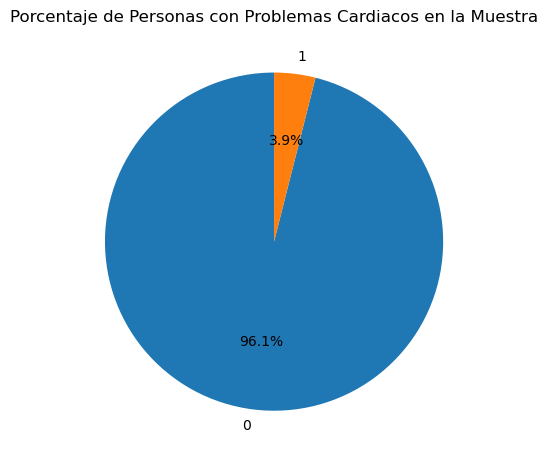

In [23]:

# grafico de torta
plt.figure(figsize=(12,8)) 
plt.subplot(1,2,2)
plt.pie(tabla_heart["Frec. Rel."], labels=tabla_heart["heart_disease"],autopct='%1.1f%%',startangle=90)
plt.title('Porcentaje de Personas con Problemas Cardiacos en la Muestra')
plt.show() 

*Nota:* 0 -> No presentan problemas cardiacos, 1-> Si presentan problemas cardiacos.

**Conclusión:** Se evidencia una baja variabilidad en los porcentajes de distribución de la muestra en personas con problemas cardiacos. Esta variable podría introducir preferencias a nuestro modelo de clasificación. Por consiguiente, no se tendrá en cuenta para el análisis.

### Análisis variable Cuantitativas 

Se procede analizar cada variable individual:


In [25]:
df[['bmi','hbA1c_level', 'blood_glucose_level', 'age']].describe()

,bmi,hbA1c_level,blood_glucose_level,age
count,99968.000000,99968.000000,99968.000000,99968.000000
mean,27.320757,5.527539,138.059269,41.888150
std,6.637318,1.070666,40.710000,22.516775
min,10.010000,3.500000,80.000000,0.080000
25%,23.630000,4.800000,100.000000,24.000000
50%,27.320000,5.800000,140.000000,43.000000
75%,29.580000,6.200000,159.000000,60.000000
max,95.690000,9.000000,300.000000,80.000000


BMI 
- El 75% de los datos tienen un IMC menor a 29.58, lo que sugiere que la mayoría no está en obesidad severa, pero sí en sobrepeso.

HbA1c
- El 50% de los datos tienen valores menores a 5.8, lo cual está dentro del rango normal.
- El 75% está por debajo de 6.8, lo que indica que una parte significativa tiene niveles prediabéticos o diabéticos.

blood_glucose_level
- El 50% de los datos están por debajo de 140, que es el umbral para la prediabetes.

Age
Media: 41.88 años
Rango: 0.08 - 80 años
- El 75% tiene menos de 60 años, pero el máximo es 80, lo que sugiere una población envejecida en ciertos casos.

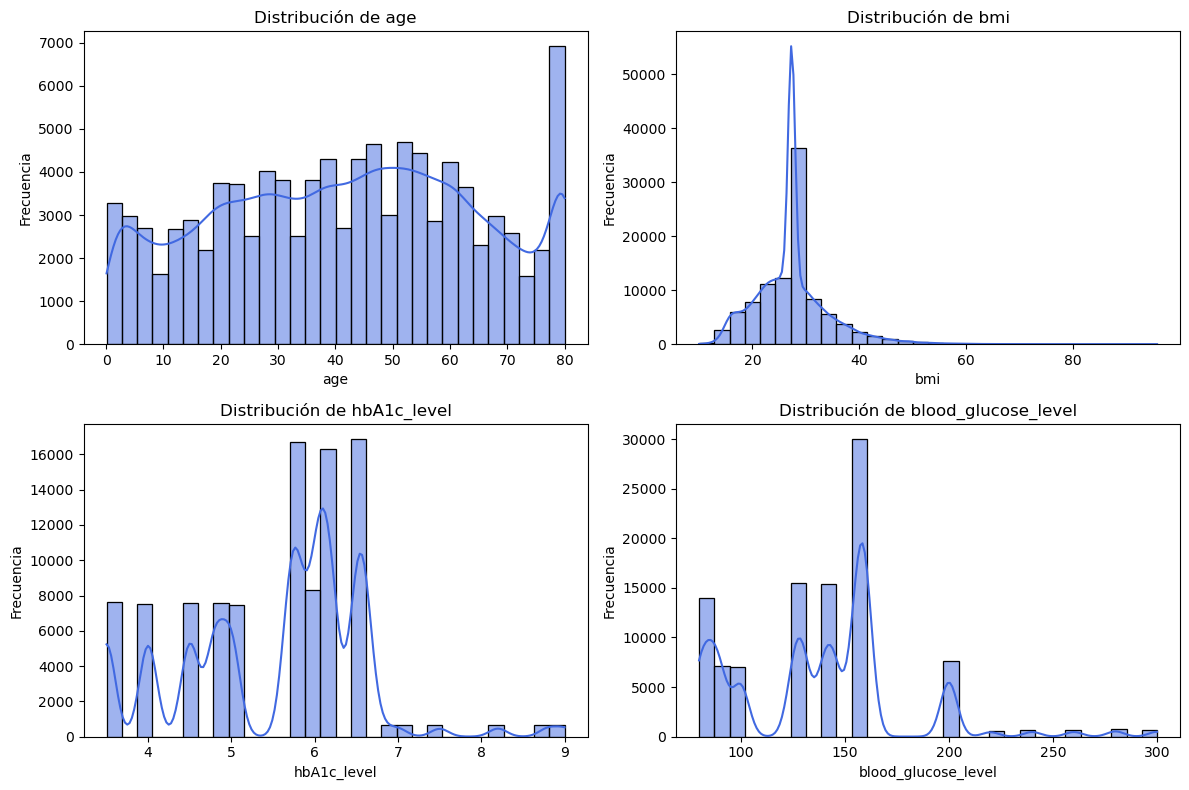

In [26]:
# Seleccionar variables continuas para análisis
continuous_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear histogramas con distribución de densidad (KDE)
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

#### Dani Conclusiones gráficas anteriores

**Conclusiónes:** De acuerdo con las estadísticas descriptivas y la gráfica, la mayoría de los casos de la muestra se concentran en personas de entre 23 y 60 años. Además, el 50% de los datos se encuentra en los 43 años, lo que sugiere que la mediana de edad es un punto clave para la detección y el manejo de la diabetes. El rango de edades es amplio, con un mínimo de 0.08 años, indicando la presencia de bebés en la muestra, y un máximo de 80 años. A simple vista, se puede intuir la necesidad de adaptar estrategias de intervención a diferentes etapas de la vida, desde la infancia hasta la tercera edad.

Conclusiones analisis de variables continuas individual



índice de Masa Corporal 
- Distribución sesgada a la derecha, con una mayoría de valores en el rango bajo-medio. 

ANALISIS DE VARIBALES CUANTITATIVAS CARO Y DANIEL PAIRPLOT OUTLIERS SACAR CONCLUSIONES


#### Variable: 'age'.

- La variable cuantitativa age permite realizar análisis más detallados, como el cálculo de medidas de tendencia central (media, mediana) y de dispersión (desviación estándar, rango), lo que facilita la identificación de tendencias, agrupamientos de edad y la correlación con otras variables, como la presencia de diabetes o hipertensión.


In [29]:
# Tabla de estadísticas descriptivas
estadisticas_age = tabla_descriptivas(df['age'])
estadisticas_age


,age
count,99968.000000
mean,41.888150
std,22.516775
min,0.080000
25%,24.000000
50%,43.000000
75%,60.000000
max,80.000000
coef. variation,0.537545
skew,-0.052161


### Análisis Bivariado


- Variables Cualitativas

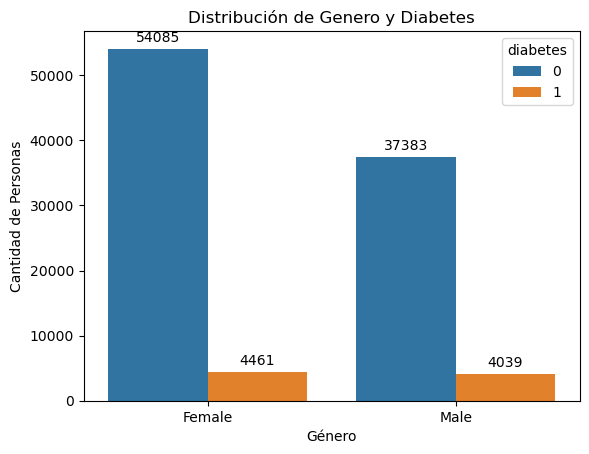

In [32]:
plt.title("Distribución de Genero y Diabetes")
df_counts = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')
# Plot
ax = sns.barplot(data=df_counts, x='gender', y='count', hue='diabetes')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.ylabel('Cantidad de Personas')
plt.xlabel('Género')
plt.show()

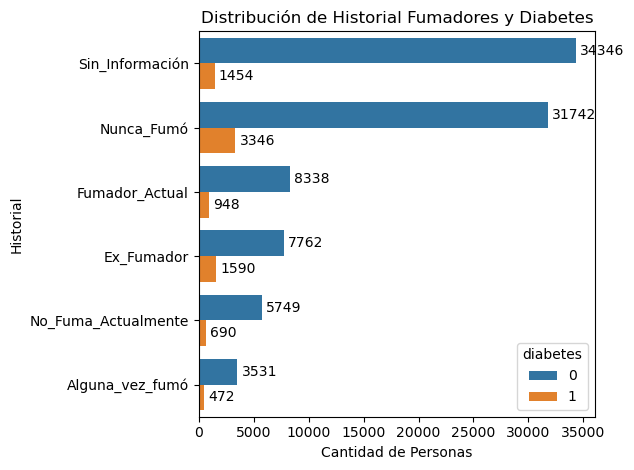

In [33]:
plt.title("Distribución de Historial Fumadores y Diabetes")
df_counts = df.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count').sort_values('count', ascending=False)
# Plot
ax = sns.barplot(data=df_counts, y='smoking_history', x='count', hue='diabetes')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Cantidad de Personas')
plt.ylabel('Historial')
plt.tight_layout()
plt.show()

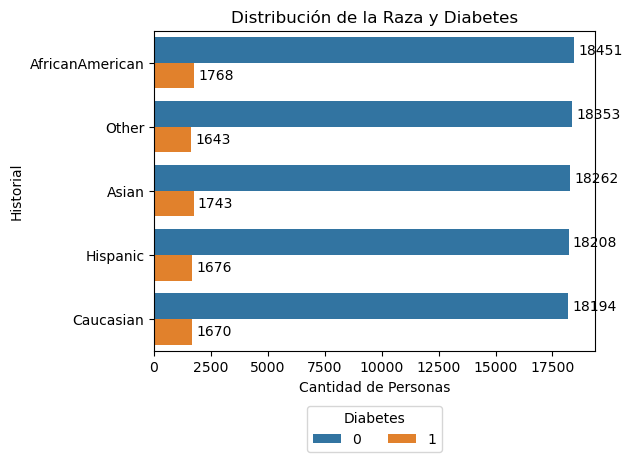

In [34]:
plt.title("Distribución de la Raza y Diabetes")
df_counts = df.groupby(['race', 'diabetes']).size().reset_index(name='count').sort_values('count', ascending=False)
# Plot
ax = sns.barplot(data=df_counts, y='race', x='count', hue='diabetes')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Cantidad de Personas')
plt.ylabel('Historial')
plt.legend(title='Diabetes', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

*Nota*: 0 -> No, 1 -> Si

**Conclusión:**

**Conclusión Análisis Bivariado Variables Cualitativas:** Según los gráficos presentados, se infiere que; al momento de construir el modelo, no se presentará una preferencia entre las categorías. Los resultados evidencian un equilibrio en la distribución de las variables en relación con la presencia de diabetes.

### Análisis Bivariado cuantitativo


#### Distintos tipos de Correlación con Pearson, Spearman & Kendall

In [50]:
# Seleccionar las variables a analizar
variables = ["age", "bmi", "hbA1c_level", "blood_glucose_level", "diabetes"]

# Calcular la correlación para Pearson, Spearman y Kendall
correlations = {}
for method in ["pearson", "spearman", "kendall"]:
    correlations[method] = df[variables].corr(method=method)["diabetes"]

# Convertir a DataFrame para visualizar mejor
correlation_df = pd.DataFrame(correlations)
print(correlation_df.round(3))

                     pearson  spearman  kendall
age                    0.258     0.262    0.216
bmi                    0.214     0.200    0.168
hbA1c_level            0.401     0.329    0.279
blood_glucose_level    0.420     0.274    0.232
diabetes               1.000     1.000    1.000


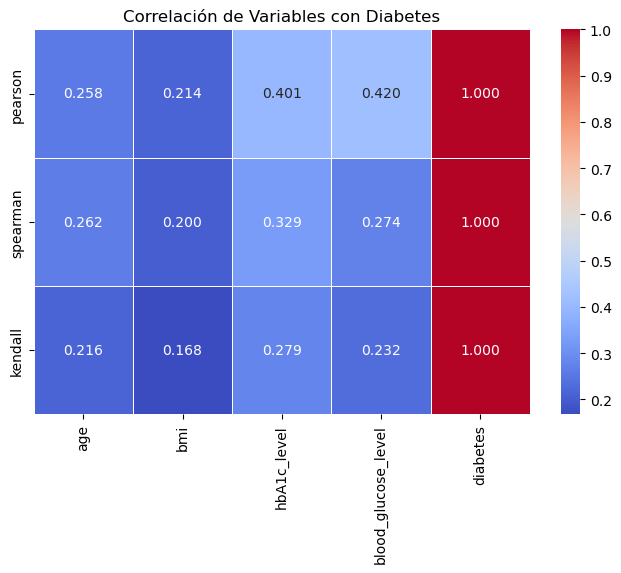

In [49]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_df.T, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".3f")
plt.title("Correlación de Variables con Diabetes")
plt.show()

#### Interpretación de las distintas correlaciones

- La variable más correlacionada con la diabetes es el nivel de glucosa en sangre (blood_glucose_level), con una correlación de 0.42 en Pearson. Esto indica que a mayor nivel de glucosa en sangre, mayor es la probabilidad de tener diabetes.
- El nivel de HbA1c (hbA1c_level) también muestra una fuerte correlación con la diabetes (0.401 en Pearson). Esto tiene sentido, ya que HbA1c mide el promedio de glucosa en sangre en los últimos meses.
- La edad (age) tiene una correlación moderada (0.258 en Pearson). Esto sugiere que las personas mayores tienen mayor probabilidad de tener diabetes, pero la relación no es tan fuerte como los niveles de glucosa y HbA1c.
- El índice de masa corporal (bmi) tiene la correlación más baja (0.214 en Pearson). Aunque el sobrepeso es un factor de riesgo, la relación no es tan fuerte en este conjunto de datos.

#### Conclusión
- Las variables que más influyen en la diabetes en este dataset parecen ser blood_glucose_level y hbA1c_level.
- El bmi tiene una correlación más baja, lo que indica que en este dataset no es un predictor tan fuerte de la diabetes, aunque sigue siendo relevante.

#### Análisis comparativo de variables continuas según diagnóstico de diabetes

In [53]:
# Lista de variables a analizar
selected_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

# Crear un DataFrame vacío para almacenar las estadísticas
combined_stats = pd.DataFrame()

# Generar estadísticas descriptivas para cada variable agrupada por diabetes
for var in selected_vars:
    stats = df.groupby("diabetes")[var].describe()
    stats["variable"] = var  # Agregar una columna con el nombre de la variable
    combined_stats = pd.concat([combined_stats, stats])  # Unir las estadísticas

# Reorganizar columnas para mejor presentación
combined_stats = combined_stats.reset_index().set_index(["variable", "diabetes"])

# Mostrar tabla
display(combined_stats)  # Mejor visualización en Jupyter Notebook



count        mean        std     min     25%  \
variable            diabetes                                                   
age                 0         91468.0   40.117075  22.306034    0.08   22.00   
                    1          8500.0   60.946588  14.549880    3.00   52.00   
bmi                 0         91468.0   26.887000   6.373914   10.01   23.24   
                    1          8500.0   31.988382   7.558371   10.98   27.32   
hbA1c_level         0         91468.0    5.396750   0.971586    3.50    4.80   
                    1          8500.0    6.934953   1.076562    5.70    6.10   
blood_glucose_level 0         91468.0  132.851970  34.247292   80.00  100.00   
                    1          8500.0  194.094706  58.641111  126.00  145.00   

                                 50%       75%     max  
variable            diabetes                            
age                 0          40.00   57.0000   80.00  
                    1          62.00   72.0000   80.00  
bmi                 0          27.32   28.8700   95.69  
                    1          29.97   35.9125   88.72  
hbA1c_level         0           5.80    6.2000    6.60  
                    1           6.60    7.5000    9.00  
blood_glucose_level 0         140.00  158.0000  200.00  
                    1         160.00  240.0000  300.00

#### Conclusión

- Las personas con diabetes (1) tienen una edad promedio de 60.95 años, mientras que las personas sin diabetes (0) tienen un promedio de 40.12 años.
- El bmi promedio de personas con diabetes es 31.99, mientras que el de personas sin diabetes es 26.89.
- Las personas con diabetes tienden a tener un IMC más alto, lo que sugiere una relación con el sobrepeso y la obesidad.
- Las personas con diabetes tienen un promedio de HbA1c de 6.93, mientras que las personas sin diabetes tienen un promedio de 5.39.Los valores más altos de HbA1c están fuertemente relacionados con la presencia de diabetes.
- Las personas con diabetes tienen un nivel promedio de glucosa en sangre de 194.09, mientras que las personas sin diabetes tienen 132.85.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\2374594430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")


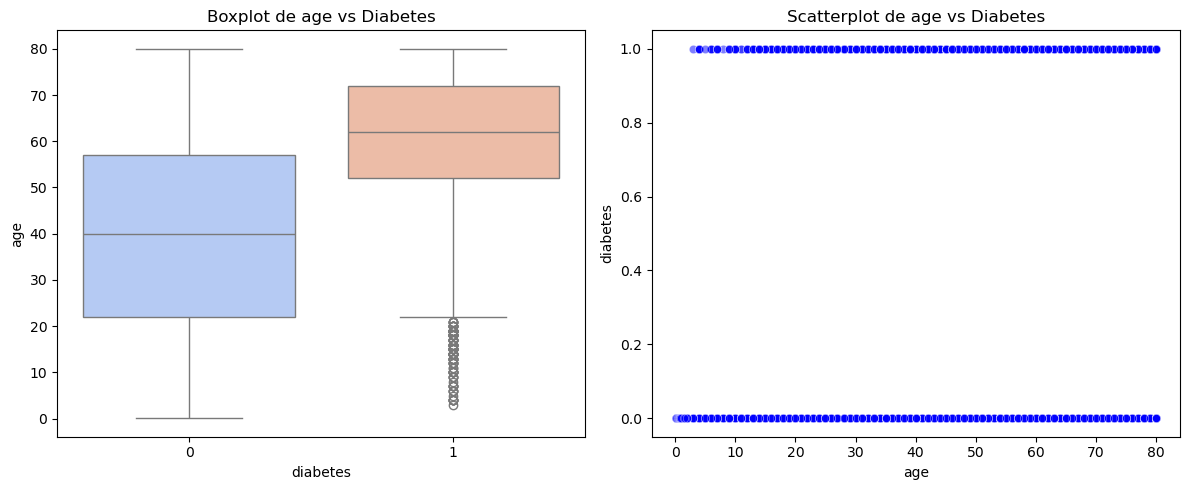

C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\2374594430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")


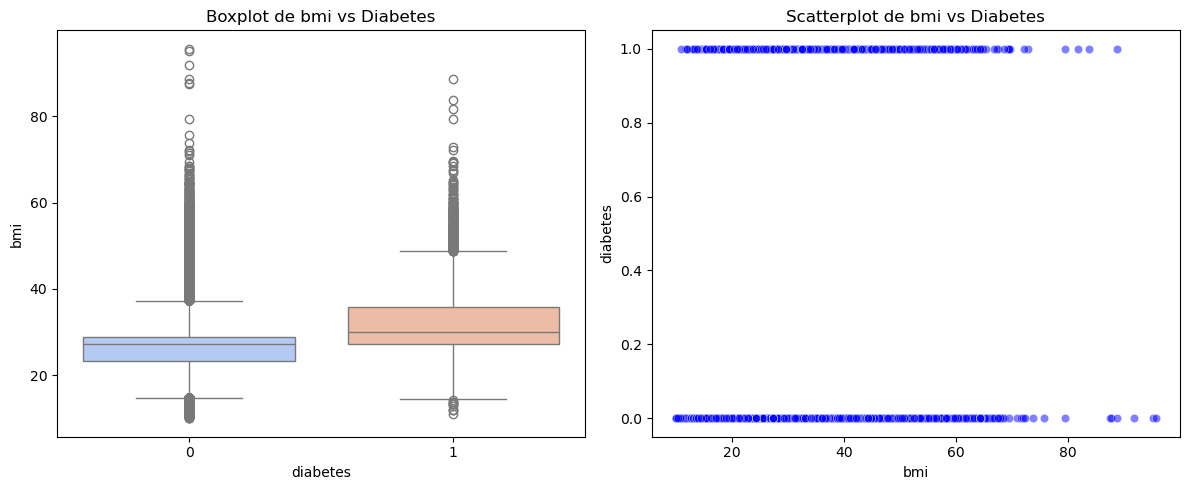

C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\2374594430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")


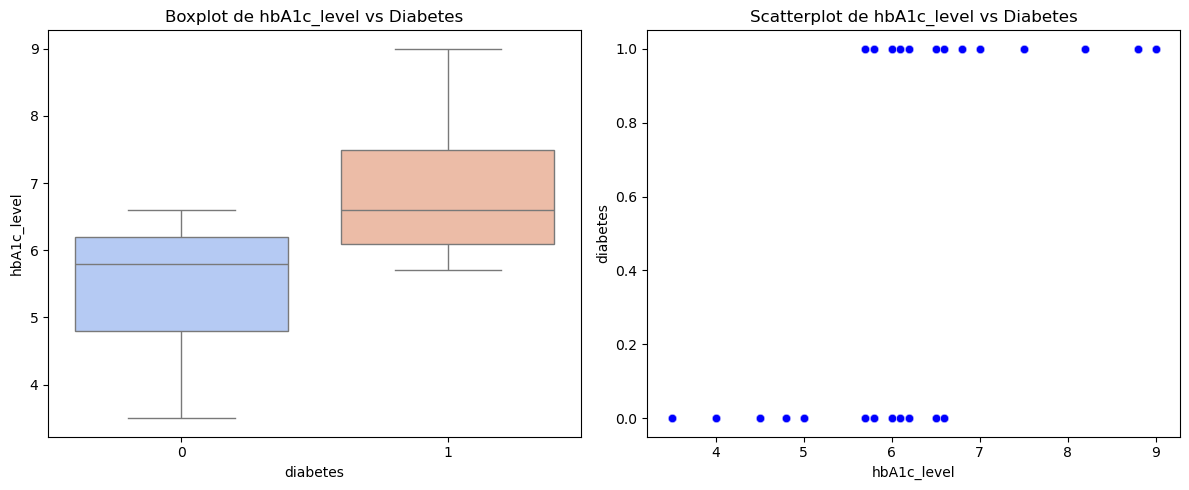

C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\2374594430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")


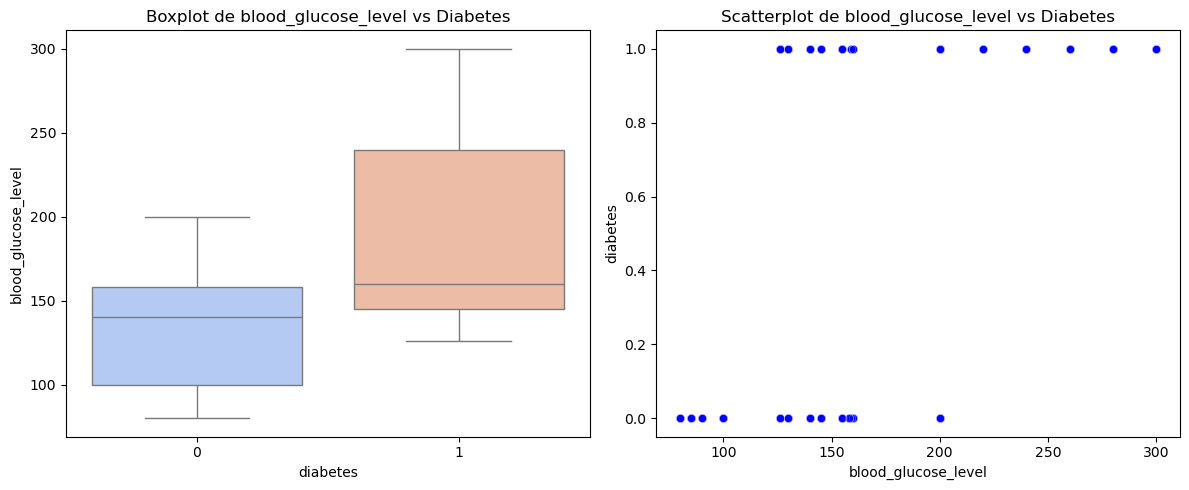

In [51]:
# Variables seleccionadas para el análisis
selected_vars = ["age", "bmi", "hbA1c_level", "blood_glucose_level"]

for col in selected_vars:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x="diabetes", y=col, data=df, palette="coolwarm")
    plt.title(f"Boxplot de {col} vs Diabetes")

    # Scatterplot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[col], y=df["diabetes"].astype(float), alpha=0.5, color="blue")
    plt.title(f"Scatterplot de {col} vs Diabetes")

    plt.tight_layout()
    plt.show()

El grafico muestra que las personas con diabetes (1) tienden a tener un BMI mas alto en comparacion con las personas que no presentan la enfermedad, La mediana y la media del BMI en el grupo con diabetes son mayores, lo que sugiere una relación entre el sobrepeso y la probabilidad de desarrollar diabetes, Sin embargo se observa una superposición en los rangos de BMI entre ambos grupos lo que puede indicar que este factor, aunque relevante, no es el único determinante de la enfermedad.

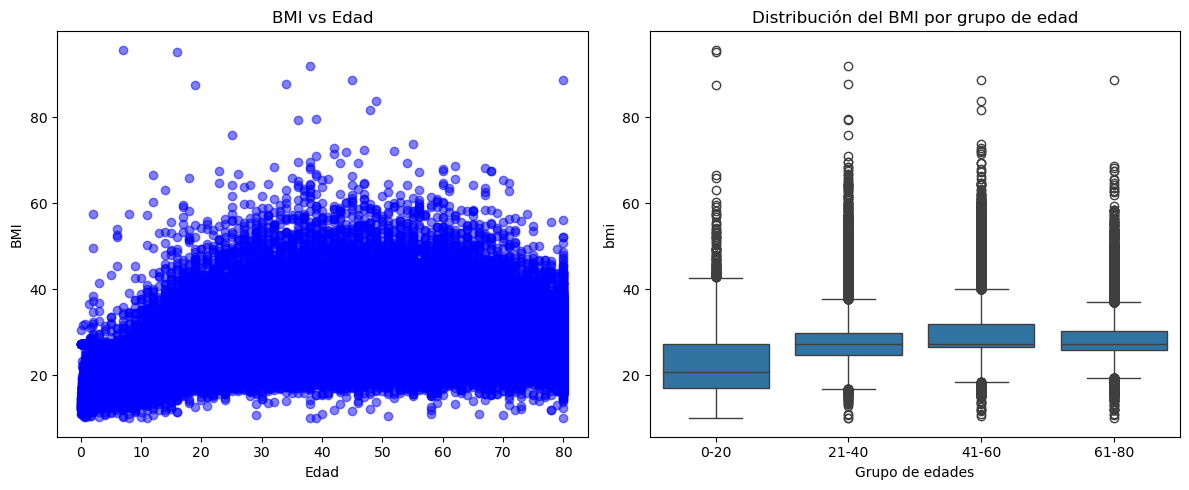

In [56]:
#Gráfico de distribución entre BMI y edad
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfico de dispersión
axes[0].scatter(df['age'], df['bmi'], color='blue', alpha=0.5)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('BMI')
axes[0].set_title('BMI vs Edad')

# Gráfico de boxplot
df['Grupo de edades'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80],
labels=['0-20', '21-40', '41-60', '61-80'])
sns.boxplot(x='Grupo de edades', y='bmi', data=df, ax=axes[1])
axes[1].set_title('Distribución del BMI por grupo de edad')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

En el grafico de distribución se puede observar una mayor densidad de puntos en el rango de edades de 20 a 70 años con valores de BMI aproximadamente entre 20 y 40 y algunos valores atípicos con un BMI superior a 70 en edades muy bajas lo que podría indicar registros atípicos o errores en los datos, por otro lado, no parece haber una correlación clara entre la edad y el BMI, ya que el BMI se mantiene distribuido de forma relativamente uniforme en todas las edades

En el boxplot se observa que la mediana del BMO se mantiene relativamente constante en todos los grupos de edad, rondando valores cercanos a 25-30, lo que indica que el índice de masa corporal promedio no varía drásticamente con la edad y nuevamente se observan gran cantidad de valores atípicos que reflejan que hay individuos con obesidad en todas las franjas de edad, lo que podría sugerir que la obesidad no es exclusiva de adultos mayores, sino que afecta a todas las edades.


Se han escogido las variables BMI y EDAD porque son determinantes para el desarrollo de diabetes en la población, sin embargo, queremos conocer la correlación y otras metricas para corroborar que estas variables si se relacionan y pueden explicar la diabetes.

In [57]:
##Correlación de las variables
correlacion_bmi_age = df['bmi'].corr(df['age'])
print(f"La correlación entre BMI y edad es: {correlacion_bmi_age}")


La correlación entre BMI y edad es: 0.33740781544584847


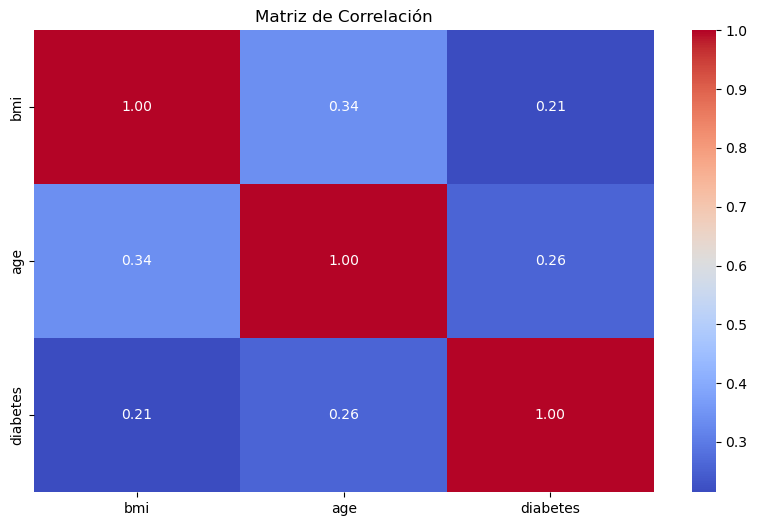

In [58]:
## Matriz de Correlación
plt.figure(figsize=(10,6))
sns.heatmap(df[['bmi', 'age', 'diabetes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Teniendo en cuenta el gráfico anterior ninguna de las correlaciones es extremadamente fuerte( no se acercan a 1 o -1).
Tanto el BMI como la Edad tienen una relación positiva con la diabeter, lo que significa que mayor BMI o mayor edad, hay una ligera tendencia a un mayor riesgo de diabetes.

Sin embargo, debido a que los valores de correlación son relativamente bajos entre 0.2 y .34 indica que hay otros factores importantes además de BI y la Edad que influyen en el desarrollo de diabetes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\1932769720.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_828\1932769720.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


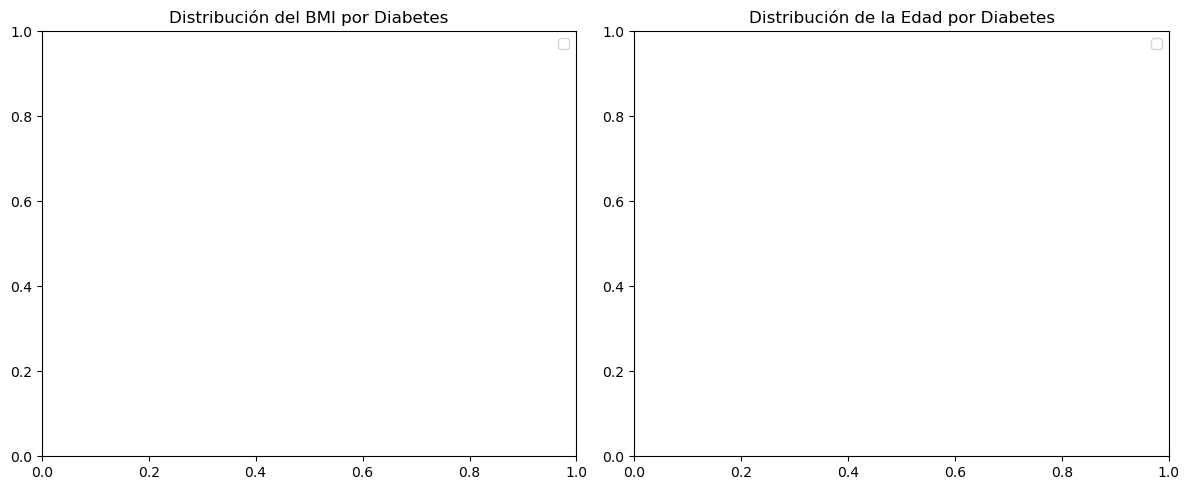

In [59]:
# 🔹 Histogramas comparativos de BMI y Edad según Diabetes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['diabetes'] == 0]['bmi'], bins=30, kde=True, color="blue", label="No Diabetes", ax=axes[0])
sns.histplot(df[df['diabetes'] == 1]['bmi'], bins=30, kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].set_title("Distribución del BMI por Diabetes")
axes[0].legend()

sns.histplot(df[df['diabetes'] == 0]['age'], bins=30, kde=True, color="blue", label="No Diabetes", ax=axes[1])
sns.histplot(df[df['diabetes'] == 1]['age'], bins=30, kde=True, color="red", label="Diabetes", ax=axes[1])
axes[1].set_title("Distribución de la Edad por Diabetes")
axes[1].legend()

plt.tight_layout()
plt.show()

En el gráfico de distribución del BMI por Diabetes la mayor parte de la población (tanto con o sin diabetes) tienen un BMI entre 20 y 40.
En bmi bajos (menores a 25), casi no hay presencia de diabetes.
A partir de un BMI de 30 en adelante, se emepiza a ver una mayor proporción de personas con diabetes.

En el gráfio de la Edad por Diabetes se observa que a los jovenes menores de 30 años tienen una presencia bastante baja de diabetes. A partir de los 40 años, la proporción de personas con diabetes comienza a aumentar.
En edades mayores a los 60 años hay un crecimiento marcado en la cantidad de personas con diabetes.

Esto indica que la edad es un factor de riesgo para la diabetes, ya que la probabilidad de tenerla aumenta con los años.

In [ ]:
# Generar el pairplot
sns.pairplot(df, vars=['bmi', 'age'], hue='diabetes', diag_kind='kde', palette={0: "blue", 1: "red"})

# Mostrar el gráfico
plt.show()

La diabetes (rojo) es más frecuente en personas con bmi alto y edad avanzada, lo que indica que ambos factores pueden estar relacionados con un mayor riesgo de diabetes.

Conclusión: existe una correlación positiva moderada de 0,3374 entre el índice de masa corporal BMI y la edad, es decir, a medida que aumenta la edad los individuos en algunos casos, tienden a aumentar su BMI. Sin embargo, no es lo suficientemente fuerte como para ser considerada altamente significativa.

### Conclusiones:

El análisis bivariado indica que tanto el BMI como la Edad tienen una relación significativa con la diabetes. Las personas con un BMI alto y aquellas de mayor edad tienen un riesgo más elevado de desarrollar la enfermedad. Estos resultados destacan la importancia de implementar estrategias preventivas enfocadas en el control del peso y el seguimiento de factores de riesgo en adultos mayores.

Aunque existe una tendencia de que las personas mayores tienden a tener un BMI más alto, esta relación no es lo suficientemente fuerte como para ser concluyente.

**Próximos pasos** Implementar un modelo de regresión multivariable para evaluar cómo factores como el BMI, la edad, la hipertensión, y los niveles de glucosa interactúan en el riesgo de diabetes. Además, sería útil explorar la distribución del BMI en diferentes grupos etarios y realizar modelos predictivos para estimar la probabilidad de desarrollar diabetes. También se pueden analizar las comorbilidades (hipertensión, enfermedades cardíacas) en conjunto con la edad y el BMI para identificar patrones de riesgo más complejos.